# k-Nearest Neighboors from Scratch

Learn how to implement k-nearest neighboors algorithm from scratch

## Importing Libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, load_iris, load_breast_cancer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## KNN Algorithm

k-Nearest Neighbours is pretty simple supervised learning algorithm to implement and it doesn't require fitting process, meaning there is no gradient descend or any other techniques for learning model coefficients (weights). Instead, the algorithm simply measure distance for each new data point that needs to be classified with its closest neighboors. 

1. Load Data into the Model and choose number of neighboors (k)
2. Predict labels for new (unseen) data:
    - Measure distance of new data point to all the labelled data (Euclidian or Minkowski or any other distances)
    - Sort distances in ascending order, hence closest neighboors first
    - Select k closest neighboors from the sorted list (this is k-neighboors)
    - Select most common label from k-neighboors
    - Assign this label to the new data point

In [62]:
def minkowski_distance(a, b, p=1): 
    distance = 0
    for d in range(len(a)):
        distance += abs(a[d] - b[d])**p
    distance = distance**(1/p)
    return distance

class KNN:
    
    def fit(self, X, y, k=5):
        self.X = X
        self.y = y
        self.k = k
        
    def predict(self, X):
        predictions = []
        for sample in X:
            # Distances of a single test data point to all the data
            distance = []
            for i in range(len(self.X)):
                # Calculate distances, add them to the list along with labels
                distance.append((minkowski_distance(sample, self.X[i]), self.y[i]))
            # Sort distances and select k-closest neighboors
            distance = sorted(distance, key=lambda x: x[0])[:self.k]
            # Predict label
            label = Counter([i[1] for i in distance]).most_common(1)[0][0]
            # Assign label to unseen data point)
            predictions.append(label)
        return predictions     

## Testing Alogrithm on Different Datasets

## 1. Blobs

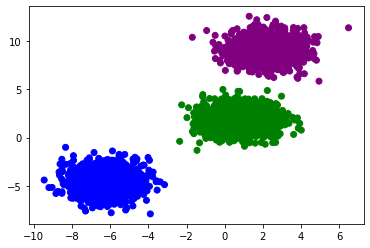

In [21]:
data = make_blobs(n_samples=4000, n_features=2, centers=3)

colors = ['purple','green','blue']

plt.scatter(data[0][:,0], data[0][:,1], c=[colors[i] for i in data[1]])
plt.show()

In [55]:
model = KNN()
model.fit(data[0], data[1])
test = np.array([[-6, 0], [-2, 0], [2, 9]])
y_pred = model.predict(test)

### Evaluation

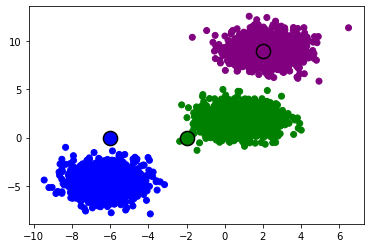

In [61]:
plt.scatter(data[0][:,0], data[0][:,1], c=[colors[i] for i in data[1]])
for i in range(len(test)):
    plt.scatter(
        test[i][0], 
        test[i][1], 
        facecolor=colors[y_pred[i]], 
        marker='o', 
        s=200, 
        edgecolor='black', 
        linewidth=1.5,
    )
plt.show()

## 2. Breast Cancer Dataset

In [44]:
X = load_breast_cancer().data
y = load_breast_cancer().target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
model = KNN()
model.fit(X_train, y_train, k=5)

### Evaluation

In [46]:
y_pred = model.predict(X_test)

In [47]:
confusion_matrix(y_test, y_pred)

array([[48,  4],
       [ 0, 91]])

In [48]:
accuracy_score(y_test, y_pred)

0.972027972027972

## 3. Iris Dataset

In [49]:
X = load_iris().data
y = load_iris().target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [50]:
model = KNN()
model.fit(X_train, y_train, k=5)

### Evaluation

In [51]:
y_pred = model.predict(X_test)

In [52]:
confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 10]])

In [53]:
accuracy_score(y_test, y_pred)

0.9736842105263158